# Introduction 

### Wine Quality DataSet

- This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. - The datasets can be viewed as classification or regression tasks.

### This data frame contains the following columns:
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10- sulphates
- 11 - alcohol 
- 12 - quality

 
# Work plan  

- EDA
- Building a Machine Learning Model


# 1- Analyze and explore data  

In [1]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Importing the dataset

df=pd.read_csv("../input/wine-quality-dataset/WineQT.csv")

In [3]:
# looking the data set 

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
 #print the shape dataset
    
print("Shape The Data Set ", df.shape )

Shape The Data Set  (1143, 13)


In [5]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#checking null value 
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

-  No missing value present in the data

In [7]:
# Describe value data set
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
# Drop columns ID , not adding any value to the data

df.drop(columns="Id",inplace=True)


#the unique quality 

print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


In [9]:
# making Group by to check realtions with other columns

ave_qu = df.groupby("quality").mean().round(2)
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.45,0.90,0.21,2.67,0.11,8.17,24.50,1.0,3.36,0.55,9.69
4,7.81,0.70,0.17,2.57,0.09,14.85,40.61,1.0,3.39,0.64,10.26
5,8.16,0.59,0.24,2.54,0.09,16.61,55.30,1.0,3.30,0.61,9.90
6,8.32,0.50,0.26,2.44,0.09,15.22,39.94,1.0,3.32,0.68,10.66
7,8.85,0.39,0.39,2.76,0.08,14.54,37.49,1.0,3.29,0.74,11.48
8,8.81,0.41,0.43,2.64,0.07,11.06,29.38,1.0,3.24,0.77,11.94


<AxesSubplot:xlabel='quality'>

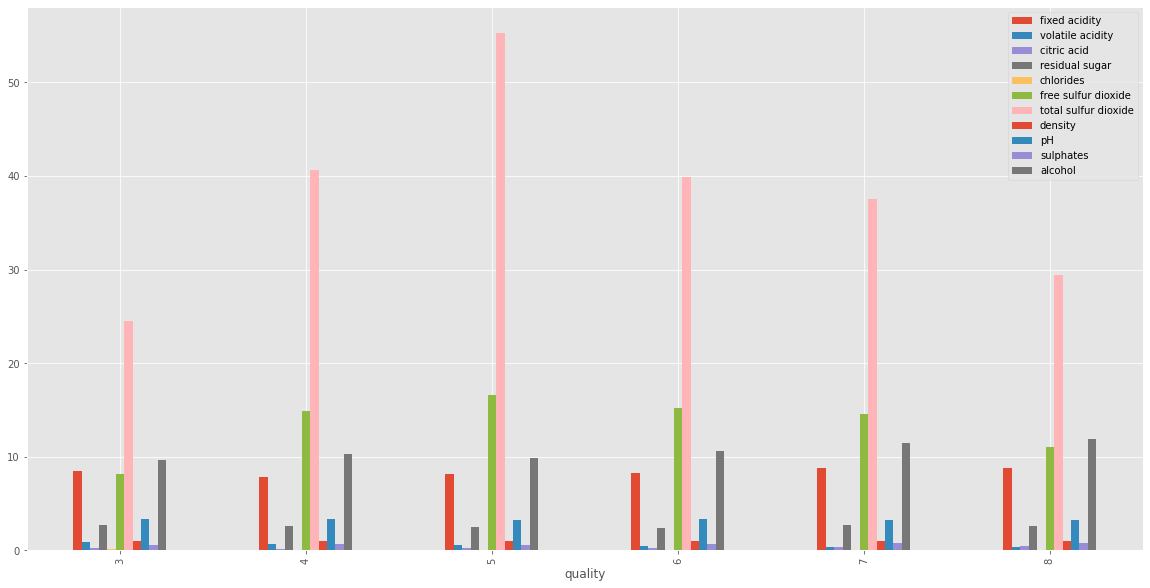

In [10]:
# graph the group by\
ave_qu.plot(kind="bar",figsize=(20,10))

- now we see  the effect of the elements on the quality

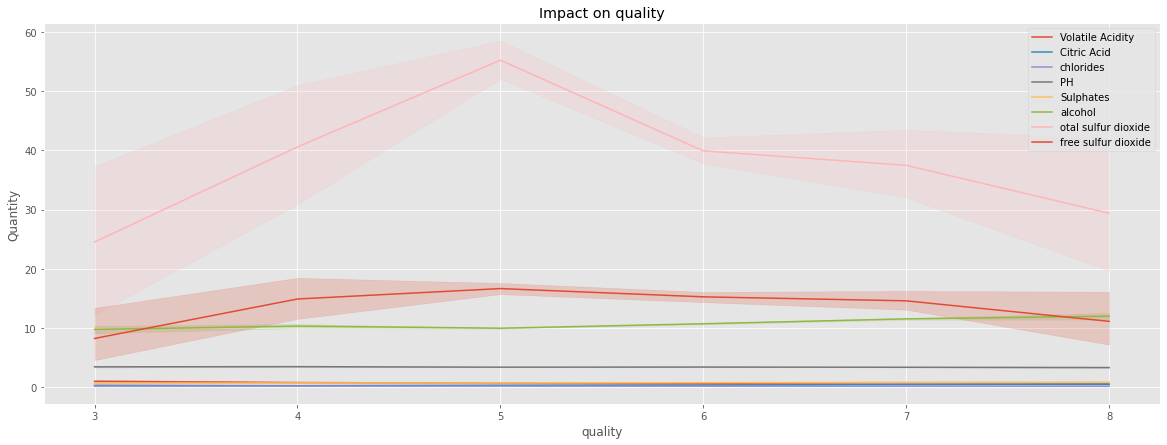

In [11]:
# let see effect elements on the quality - details
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
sns.lineplot(data=df, x="quality",y="alcohol", label="alcohol")
sns.lineplot(data=df, x="quality",y="total sulfur dioxide", label="otal sulfur dioxide")
sns.lineplot(data=df, x="quality",y="free sulfur dioxide", label="free sulfur dioxide")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

- We see effects of few elements on quality, let's check them individually

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

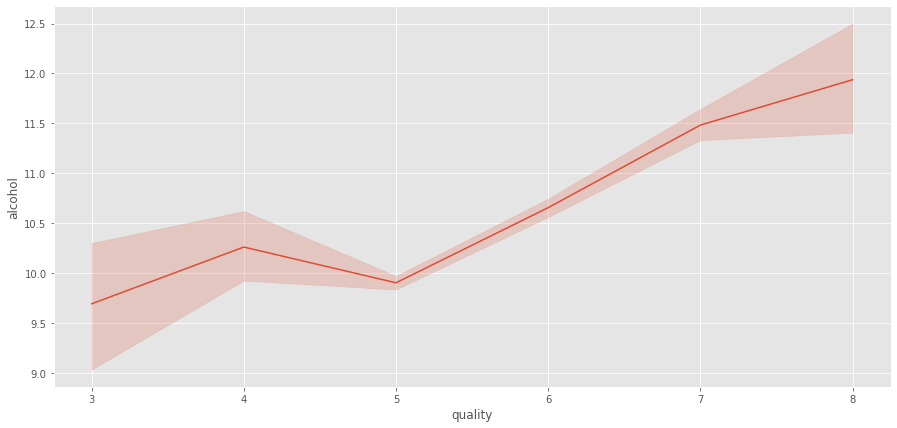

In [12]:
# effect the Alcohol in the quality

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

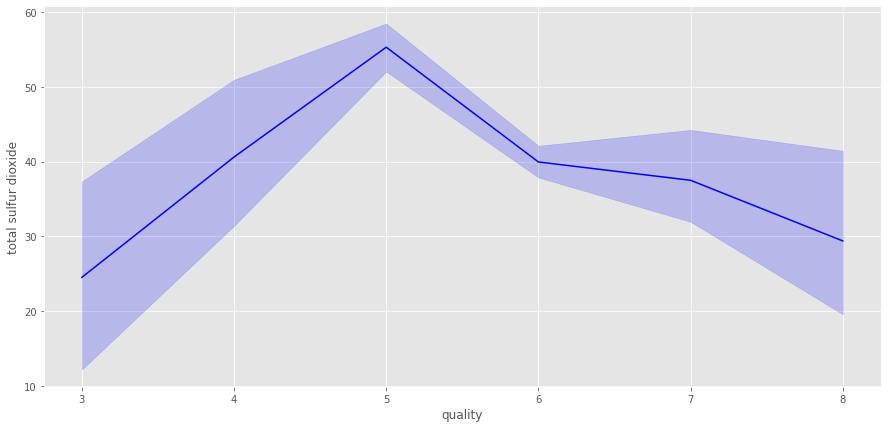

In [13]:
# effect the total sulfur dioxide in the quality
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",color="b")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

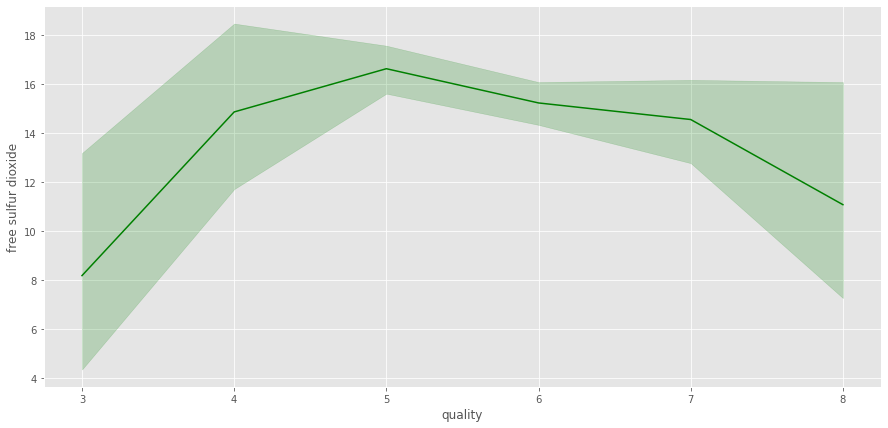

In [14]:
# effect the free sulfur dioxide in the quality

plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",color="g")

In [15]:
# using graph interactive the show the effect free and total - sulfur dioxide in the quality

px.scatter(df, x="free sulfur dioxide", y="total sulfur dioxide",animation_frame="quality")

# Insights:

## We have 5 types of quality in Data Set - 3 to 8
- The Best quality 8
- The less quality 3
### The elements highest effect on the quality of wine:
- 1 - Alcohol 
- 2 - Free sulfur dioxide
- 3 - Total sulfur dioxide

### The elements lessest or a simple effect on the quality of wine:
- 1 - Fixed acidity
- 2 - Volatile acidity
- 3 - Citric acid
- 4 - Residual sugar
- 5 - Chlorides
- 6 - Density
- 7 - PH
- 8 - Sulphates






# 2 -Building a Machine Learning Model

In [16]:
#Importing all the necessary librarires for building model


from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
from catboost import CatBoostRegressor,CatBoostClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor


In [17]:
#Defined X and y , and split the data train

X = df.drop(columns="quality")           
y = df["quality"]    # y = quality

In [18]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (857, 11)
X Test  :  (286, 11)
Y Train :  (857,)
Y Test  :  (286,)


### 1 -linear_model

In [19]:
# using the model LinearRegression
LR_model=LinearRegression()

# fit model
LR_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LR_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

Score the X-train with Y-train is :  0.3766893166865495
Score the X-test  with Y-test  is :  0.3487901433645896
 Model Evaluation Linear R : mean absolute error is  0.4742577332205526
 Model Evaluation Linear R : mean squared  error is  0.37215517566167367
 Model Evaluation Linear R : median absolute error is  0.3771988566534432


In [20]:
# using the model Logistic Regression

Lo_model=LogisticRegression(solver='liblinear')

# fit model

Lo_model.fit(X_train,y_train)


# Score X and Y - test and train model Logistic Regression

print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_Lo=Lo_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo)) 

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

Score the X-train with Y-train is :  0.5869311551925321
Score the X-test  with Y-test  is :  0.6258741258741258
 Model Evaluation Logistic R : mean absolute error is  0.4020979020979021
 Model Evaluation Logistic R : mean squared  error is  0.458041958041958
 Model Evaluation Logistic R : median absolute error is  0.0
 Model Evaluation Logistic R : accuracy score  0.6258741258741258


### Decision Tree Classifier

In [21]:
# using the model Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.9253208868144691
Score the X-test  with Y-test  is :  0.5594405594405595


In [22]:
# Select  Important columns

print("The Important columns \n",Tree_model.feature_importances_)


The Important columns 
 [0.06690888 0.11325703 0.06384417 0.06836425 0.06399737 0.07035485
 0.113973   0.04904842 0.05469139 0.14363796 0.19192267]


In [23]:
print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [3 4 5 6 7 8]
 Model Evaluation Decision Tree : accuracy score  0.5594405594405595


- Decision trees performs poor on test set.

### Model SVM

In [24]:
# using the model SVC
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.5950991831971996
Score the X-test  with Y-test  is :  0.6433566433566433
 Model Evaluation Decision Tree : accuracy score  0.6433566433566433


In [25]:
# using the model SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

# fit model
svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score the X-train with Y-train is :  0.14069185408666396
Score the X-test  with Y-test  is :  0.23501709956140815
 Model Evaluation Decision Tree : accuracy score  0.6433566433566433


### Neighbors model

In [26]:
# using the model K Neighbors Classifier

K_model = KNeighborsClassifier(n_neighbors = 5)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.6289381563593932
Score the X-test  with Y-test  is :  0.5314685314685315
 Model Evaluation K Neighbors Classifier : accuracy score  0.5314685314685315


### CatBoost Regressor

In [27]:
from sklearn.preprocessing import StandardScaler



catboost_classifier = CatBoostClassifier(verbose=False,  depth=5,       learning_rate=0.1,  iterations=1000,     l2_leaf_reg=4,      random_seed=42     )

catboost_classifier.fit(X_train, y_train)

y_catboost = catboost_classifier.predict(X_test)

accuracy_catboost = accuracy_score(y_test, y_catboost)

print("Score the X-train with Y-train is : ", catboost_classifier.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", catboost_classifier.score(X_test,y_test))
print("Model Evaluation CatBoost Classifier : accuracy score " , accuracy_score(y_test,y_catboost))

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.6573426573426573
Model Evaluation CatBoost Classifier : accuracy score  0.6573426573426573


### Extra Trees Clssifier

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


extra_trees_classifier = ExtraTreesClassifier(n_estimators=200,random_state=42)
extra_trees_classifier.fit(X_train, y_train)

y_extra_trees = extra_trees_classifier.predict(X_test)

accuracy_extra_trees = accuracy_score(y_test, y_extra_trees)

print("Score the X-train with Y-train is : ", extra_trees_classifier.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", extra_trees_classifier.score(X_test,y_test))
print("Model Evaluation CatBoost Classifier : accuracy score " , accuracy_extra_trees)

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.6853146853146853
Model Evaluation CatBoost Classifier : accuracy score  0.6853146853146853


### Stacking different classifiers

In [29]:
from sklearn.ensemble import StackingClassifier

base_classifiers = [
    ('random_forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('catboost', CatBoostClassifier(verbose=False, depth=5, learning_rate=0.1,iterations=1000, l2_leaf_reg=4, random_seed=42))
]

meta_classifier = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5  
)

stacking_classifier.fit(X_train, y_train)

y_stacking = stacking_classifier.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_stacking)

print("Score the X-train with Y-train is : ", stacking_classifier.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", stacking_classifier.score(X_test,y_test))
print("Model Evaluation CatBoost Classifier : accuracy score " , accuracy_stacking)

Score the X-train with Y-train is :  0.9498249708284714
Score the X-test  with Y-test  is :  0.6853146853146853
Model Evaluation CatBoost Classifier : accuracy score  0.6853146853146853


# Model building results

### These models were selected and evaluated:
### linear_model
- 1- LinearRegression
- Score the X-train with Y-train is : 0.37%
- Score the X-test with Y-test is : 0.34%
- Mean absolute error is 0.47%
- Mean squared error is 0.37%
- Median absolute error is 0.37%

- 2- LogisticRegression

- Score the X-train with Y-train is : 0.58%
- Score the X-test with Y-test is : 0.62%
- Mean absolute error is 0.40%
- Mean squared error is 0.45%
- Median absolute error is 0.0
- Accuracy score 0.625%

### Decision Tree Classifier

- Score the X-train with Y-train is : 0.92%
- Score the X-test with Y-test is : 0.54%
- Accuracy score 0.54%


### Model SVM

- 1- SVC
- Score the X-train with Y-train is : 0.59%
- Score the X-test with Y-test is : 0.64%
- Accuracy score 0.64%

- 2-SVR

- Score the X-train with Y-train is : 0.14%
- Score the X-test with Y-test is : 0.23%
- Accuracy score 0.64%

### Neighbors model

- Score the X-train with Y-train is : 0.62%
- Score the X-test with Y-test is : 0.53%
- Accuracy score 0.53%

### CatBoost model

- Score the X-train with Y-train is : 1%
- Score the X-test with Y-test is : 0.65%
- Accuracy score 0.53%

### ExtraTrees model

- Score the X-train with Y-train is : 1%
- Score the X-test with Y-test is : 0.58%
- Accuracy score 0.53%

### Stacking model

- Score the X-train with Y-train is : 0.94%
- Score the X-test with Y-test is : 0.68%
- Accuracy score 0.53%
